In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train_LZdllcl.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
df.shape

(54808, 14)

In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [6]:
df = df.drop("employee_id",axis=1)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [7]:
data = df.drop("is_promoted",axis=1)
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45


In [8]:
num_data=data.select_dtypes(include="number")
cat_data=data.select_dtypes(include="object_")

In [9]:
cat_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [10]:
cat_data = cat_data.drop("region",axis=1)
cat_data

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other
...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing
54804,Operations,Master's & above,f,other
54805,Analytics,Bachelor's,m,other
54806,Sales & Marketing,NaN,m,sourcing


In [11]:
num_data

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60
2,1,34,3.0,7,0,0,50
3,2,39,1.0,10,0,0,50
4,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78
54804,1,37,2.0,6,0,0,56
54805,1,27,5.0,3,1,0,79
54806,1,29,1.0,2,0,0,45


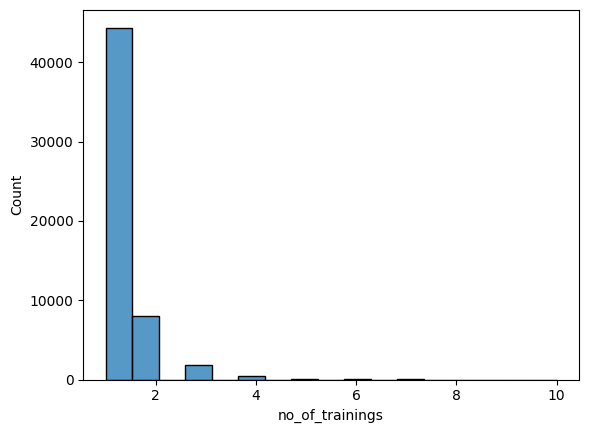

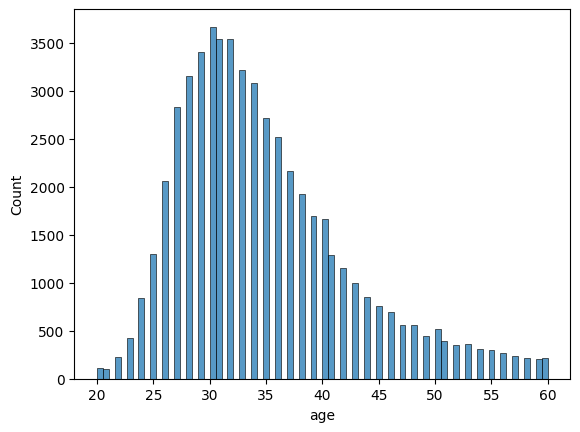

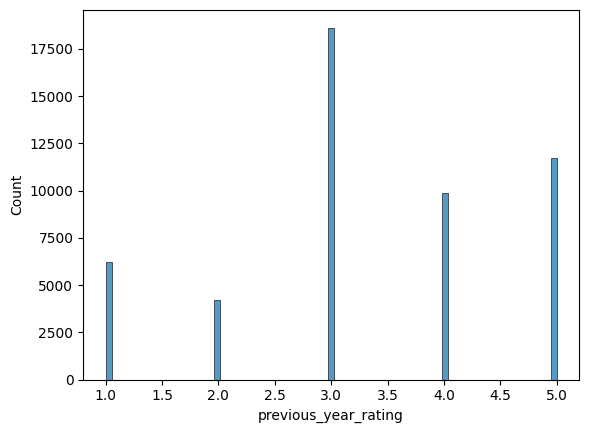

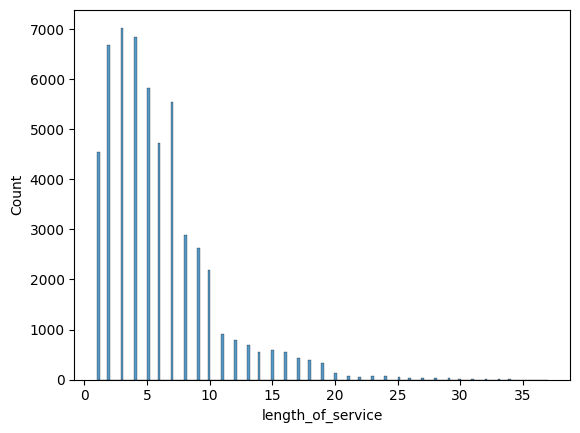

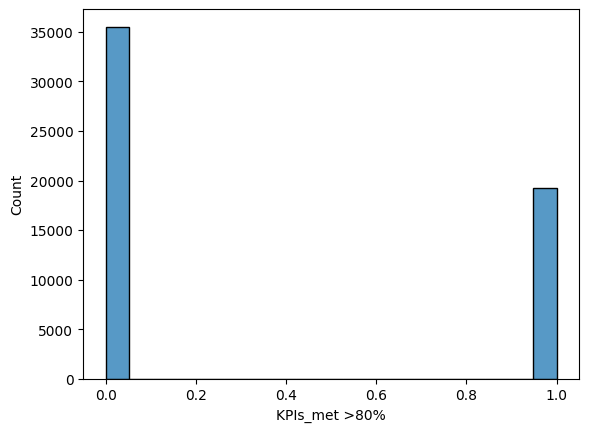

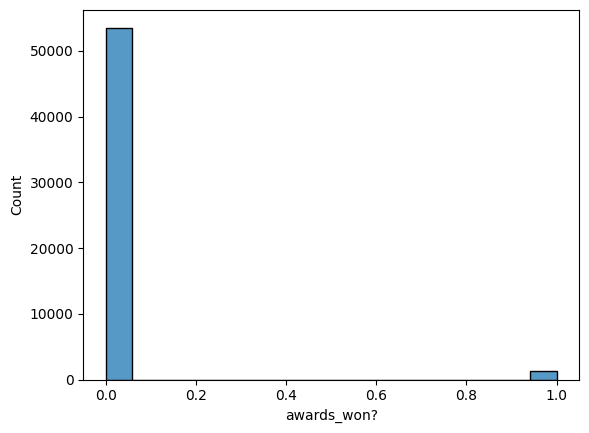

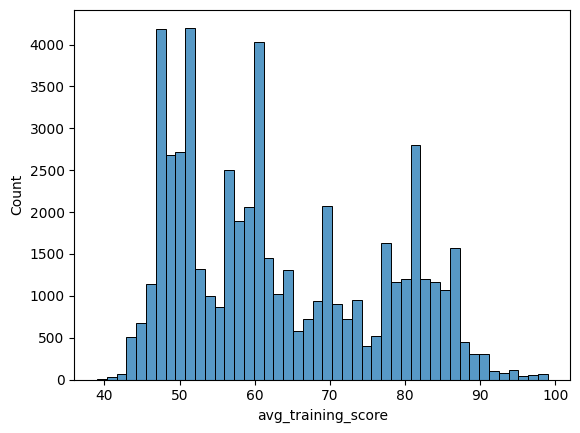

In [12]:
for col in num_data.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=col)
    plt.show()

In [13]:
num_data.isna().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [14]:
num_data["previous_year_rating"] = num_data["previous_year_rating"].fillna(num_data["previous_year_rating"].mean())

In [15]:
num_data.isna().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [17]:
cat_data

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other
...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing
54804,Operations,Master's & above,f,other
54805,Analytics,Bachelor's,m,other
54806,Sales & Marketing,NaN,m,sourcing


In [18]:
cat_data["education"] = cat_data["education"].fillna(cat_data["education"].mode()[0])

In [19]:
cat_data.isna().sum()

,0
department,0
education,0
gender,0
recruitment_channel,0


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data[['department']])
encode1 = pd.DataFrame({'department_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data[['education']])
encode2 = pd.DataFrame({'education_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data[['gender']])
encode3 = pd.DataFrame({'gender_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data[['recruitment_channel']])
encode4 = pd.DataFrame({'recruitment_channel_encoded': label_encode})


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [21]:
cat_encoded = pd.concat([encode1,encode2,encode3,encode4], axis=1)

In [22]:
cat_encoded.isna().sum()

,0
department_encoded,0
education_encoded,0
gender_encoded,0
recruitment_channel_encoded,0


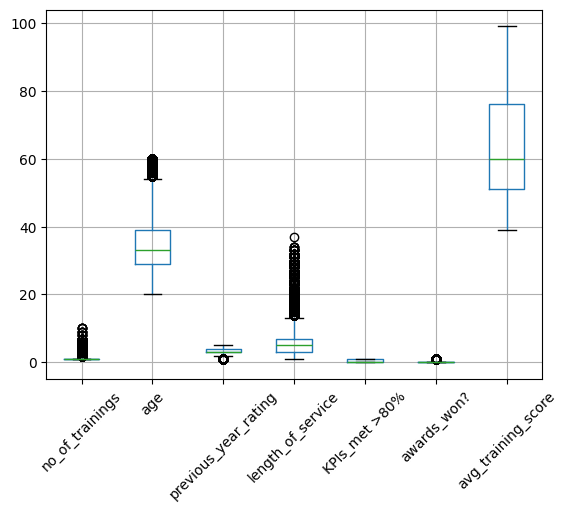

In [23]:
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

In [24]:
def outlier_removal(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[col_name] = df[col_name].clip(lower=lower_bound, upper=upper_bound)
    return df[col_name]
for col in num_data[["no_of_trainings","age","previous_year_rating","length_of_service","awards_won?"]]:
    num_data[col] = outlier_removal(num_data, col)
print(num_data[col])

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: awards_won?, Length: 54808, dtype: int64


In [25]:
num_data

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60
2,1,34,3.0,7,0,0,50
3,1,39,1.5,10,0,0,50
4,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...
54803,1,48,3.0,13,0,0,78
54804,1,37,2.0,6,0,0,56
54805,1,27,5.0,3,1,0,79
54806,1,29,1.5,2,0,0,45


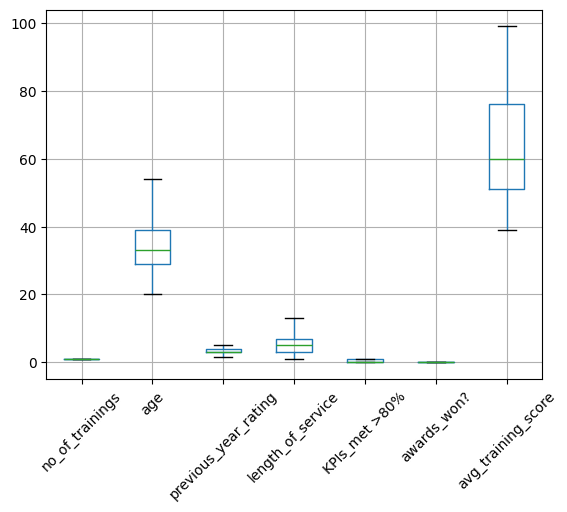

In [26]:
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['no_of_trainings', 'age', 'previous_year_rating','length_of_service','avg_training_score']
num_data[num_cols] = scaler.fit_transform(num_data[num_cols])

In [28]:
num_data

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.038093,1.455987,0.711461,1,0,-1.075931
1,0.0,-0.636174,1.455987,-0.460068,0,0,-0.253282
2,0.0,-0.096760,-0.348240,0.418579,0,0,-1.001145
3,0.0,0.577506,-1.701410,1.297225,0,0,-1.001145
4,0.0,1.386626,-0.348240,-1.045832,0,0,0.718939
...,...,...,...,...,...,...,...
54803,0.0,1.791186,-0.348240,2.175872,0,0,1.092871
54804,0.0,0.307800,-1.250353,0.125697,0,0,-0.552428
54805,0.0,-1.040734,1.455987,-0.752950,1,0,1.167657
54806,0.0,-0.771027,-1.701410,-1.045832,0,0,-1.375077


In [29]:
final_data = pd.concat([num_data,cat_encoded], axis=1)

In [30]:
final_data

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_encoded,education_encoded,gender_encoded,recruitment_channel_encoded
0,0.0,0.038093,1.455987,0.711461,1,0,-1.075931,7,2,0,2
1,0.0,-0.636174,1.455987,-0.460068,0,0,-0.253282,4,0,1,0
2,0.0,-0.096760,-0.348240,0.418579,0,0,-1.001145,7,0,1,2
3,0.0,0.577506,-1.701410,1.297225,0,0,-1.001145,7,0,1,0
4,0.0,1.386626,-0.348240,-1.045832,0,0,0.718939,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,0.0,1.791186,-0.348240,2.175872,0,0,1.092871,8,0,1,2
54804,0.0,0.307800,-1.250353,0.125697,0,0,-0.552428,4,2,0,0
54805,0.0,-1.040734,1.455987,-0.752950,1,0,1.167657,0,0,1,0
54806,0.0,-0.771027,-1.701410,-1.045832,0,0,-1.375077,7,0,1,2


In [31]:
df1 = pd.read_csv("test_2umaH9m.csv")
df1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [32]:
df1.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [33]:
df1 = df1.drop("employee_id",axis=1)
df1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [34]:
num_data1=df1.select_dtypes(include="number")
cat_data1=df1.select_dtypes(include="object_")

In [35]:
cat_data1.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [36]:
cat_data1 = cat_data1.drop("region",axis=1)
cat_data1

,department,education,gender,recruitment_channel
0,Technology,Bachelor's,m,sourcing
1,HR,Bachelor's,f,other
2,Sales & Marketing,Bachelor's,m,other
3,Procurement,Bachelor's,f,other
4,Finance,Bachelor's,m,sourcing
...,...,...,...,...
23485,Legal,Below Secondary,m,sourcing
23486,Technology,Bachelor's,m,sourcing
23487,HR,Bachelor's,f,sourcing
23488,Procurement,Bachelor's,m,sourcing


In [37]:
num_data1

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,24,NaN,1,1,0,77
1,1,31,3.0,5,0,0,51
2,1,31,1.0,4,0,0,47
3,3,31,2.0,9,0,0,65
4,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61
23486,1,31,3.0,7,0,0,74
23487,1,26,4.0,4,0,0,50
23488,3,27,NaN,1,0,0,70


In [38]:
num_data1.isna().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [39]:
num_data1["previous_year_rating"] = num_data1["previous_year_rating"].fillna(num_data1["previous_year_rating"].mean())

In [40]:
num_data1.isna().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [41]:
cat_data1

,department,education,gender,recruitment_channel
0,Technology,Bachelor's,m,sourcing
1,HR,Bachelor's,f,other
2,Sales & Marketing,Bachelor's,m,other
3,Procurement,Bachelor's,f,other
4,Finance,Bachelor's,m,sourcing
...,...,...,...,...
23485,Legal,Below Secondary,m,sourcing
23486,Technology,Bachelor's,m,sourcing
23487,HR,Bachelor's,f,sourcing
23488,Procurement,Bachelor's,m,sourcing


In [42]:
cat_data1["education"] = cat_data1["education"].fillna(cat_data1["education"].mode()[0])

In [43]:
cat_data1.isna().sum()

,0
department,0
education,0
gender,0
recruitment_channel,0


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data1[['department']])
encodes11 = pd.DataFrame({'department_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data1[['education']])
encodes12 = pd.DataFrame({'education_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data1[['gender']])
encodes13 = pd.DataFrame({'gender_encoded': label_encode})

label_encoder = LabelEncoder()
label_encode = label_encoder.fit_transform(cat_data1[['recruitment_channel']])
encodes14 = pd.DataFrame({'recruitment_channel_encoded': label_encode})

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [45]:
encodes11

,department_encoded
0,8
1,2
2,7
3,5
4,1
...,...
23485,3
23486,8
23487,2
23488,5


In [46]:
cat_encoded1 = pd.concat([encodes11,encodes12,encodes13,encodes14], axis=1)

In [47]:
cat_encoded1.isna().sum()

,0
department_encoded,0
education_encoded,0
gender_encoded,0
recruitment_channel_encoded,0


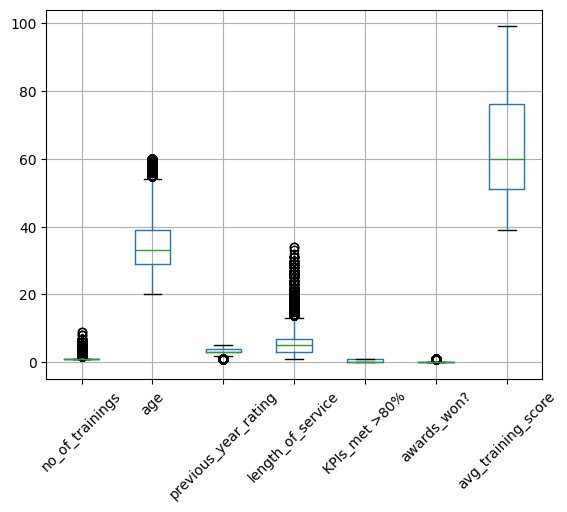

In [48]:
num_data1.boxplot()
plt.xticks(rotation=45)
plt.show()

In [49]:
def outlier_removal(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[col_name] = df[col_name].clip(lower=lower_bound, upper=upper_bound)
    return df[col_name]
for col in num_data1[["no_of_trainings","age","previous_year_rating","length_of_service","awards_won?"]]:
    num_data1[col] = outlier_removal(num_data1, col)
print(num_data1[col])

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    0
Name: awards_won?, Length: 23490, dtype: int64


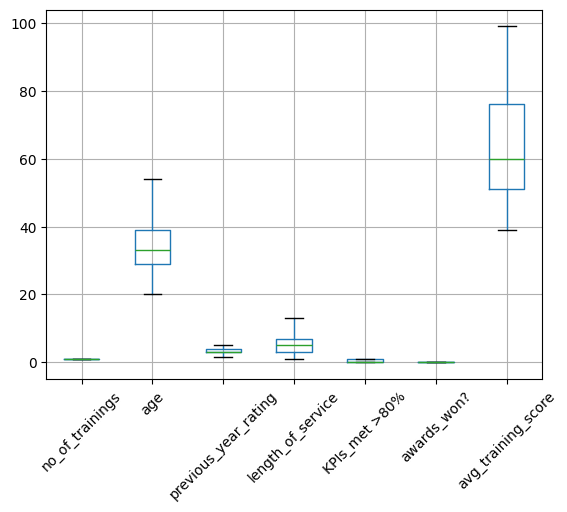

In [50]:
num_data1.boxplot()
plt.xticks(rotation=45)
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols2 = ['no_of_trainings', 'age', 'previous_year_rating','length_of_service','avg_training_score']
num_data1[num_cols2] = scaler.fit_transform(num_data1[num_cols2])

In [52]:
num_data1

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,-1.438550,-0.051413,-1.333690,1,0,1.024263
1,0.0,-0.497147,-0.357070,-0.155500,0,0,-0.914377
2,0.0,-0.497147,-1.708953,-0.450047,0,0,-1.212629
3,0.0,-0.497147,-1.258325,1.022691,0,0,0.129506
4,0.0,-0.631633,0.544186,0.433596,0,0,-0.168746
...,...,...,...,...,...,...,...
23485,0.0,-1.438550,-0.357070,-1.333690,0,0,-0.168746
23486,0.0,-0.497147,-0.357070,0.433596,0,0,0.800574
23487,0.0,-1.169578,0.544186,-0.450047,0,0,-0.988940
23488,0.0,-1.035091,-0.051413,-1.333690,0,0,0.502321


In [53]:
final_testdata = pd.concat([num_data1,cat_encoded1], axis=1)

In [54]:
cat_encoded1.isna().sum()

,0
department_encoded,0
education_encoded,0
gender_encoded,0
recruitment_channel_encoded,0


In [55]:
x_train=final_data
y_train=df[["is_promoted"]]

In [56]:
x_test = final_testdata

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)

y_pred_rf = rf_cls.predict(x_test)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [58]:
submission1 = pd.read_csv("sample_submission_M0L0uXE.csv")
submission1


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [59]:
submission1['is_promoted'] = y_pred_rf

In [60]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

In [61]:

y_pred_df = pd.DataFrame(y_pred_rf, columns=['is_promoted'])


In [62]:
submission1.to_csv("final_submissiondata.csv", index=False)

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier()

dt_cls = dt_cls.fit(x_train,y_train)

y_pred_decisiontree = dt_cls.predict(x_test)


In [64]:
submission1['is_promoted'] = y_pred_decisiontree

In [65]:
y_pred_df1 = pd.DataFrame(y_pred_decisiontree, columns=['is_promoted'])

In [66]:
submission1.to_csv("final.csv", index=False)